In [0]:
data_BASE_DIR = "dbfs:/mnt/mids-w261/OTPW_3M/"
display(dbutils.fs.ls(f"{data_BASE_DIR}"))

path,name,size,modificationTime
dbfs:/mnt/mids-w261/OTPW_3M/OTPW_3M_2015.csv.gz,OTPW_3M_2015.csv.gz,302933273,1679772434000
dbfs:/mnt/mids-w261/OTPW_3M/OTPW_3M_2015.csv.zip,OTPW_3M_2015.csv.zip,302934178,1679772445000


In [0]:
"""
1. Address missing data-- quantity and why, if we fill it out with substitution
2. Address non-numerical features -- One hot encoding?
4. List out raw features, derived features that you plan to implement/use -- correlation, feature selection and trasformation
5. Dimension reduction -- PCA if needed
7. Data pipline
"""

#Feature selection by observation
#Categorical features
    #Categorical features with high cardinality
    #One hot encoding
#Missing value and wrong format
#Features with Date type
#Feature selection by correlation
#Dimensionality Reduction PCA
#Feature Engineer
    #Skewness
        #ordinal
        #numberic
#cross validation

In [0]:
# OPTW 3 months
from pyspark.sql.functions import col

df_OTPW_3 = spark.read.csv("dbfs:/mnt/mids-w261/OTPW_3M/OTPW_3M_2015.csv.gz", header=True, inferSchema=True)
display(df_OTPW_3)

  File <command-2798664673111977>, line 3
    11
    ^
IndentationError: unexpected indent


In [0]:
# print(len(df_OTPW_3.columns))
# print(df_OTPW_3.count())
# df_OTPW_3.columns

In [0]:
#Feature selection by observation in Phase1

feature_drop = [
                'QUARTER', 'DAY_OF_MONTH', 'OP_UNIQUE_CARRIER', 'WindEquipmentChangeDate',
                'ORIGIN_STATE_FIPS', 'ORIGIN_WAC', 'DEST_STATE_FIPS', 'DEST_WAC',
                'YEAR', 'MONTH', 'sched_depart_date_time_UTC', 'four_hours_prior_depart_UTC',
                'two_hours_prior_depart_UTC', 'DailyAverageDewPointTemperature', 'DailyAverageDryBulbTemperature', 'DailyAverageRelativeHumidity', 'FLIGHTS', 'sched_depart_date_time','DATE',
                'DailyAverageSeaLevelPressure', 'DailyAverageStationPressure', 'DailyAverageWetBulbTemperature', 'DailyAverageWindSpeed',
                'DailyCoolingDegreeDays', 'DailyDepartureFromNormalAverageTemperature', 'DailyHeatingDegreeDays', 'DailyMaximumDryBulbTemperature',
                'DailyMinimumDryBulbTemperature', 'DailyPeakWindDirection', 'DailyPeakWindSpeed', 'DailyPrecipitation', 'ARR_DELAY_NEW',
                'DailySnowDepth', 'DailySnowfall', 'DailySustainedWindDirection', 'DailySustainedWindSpeed',
                'DailyWeather', 'MonthlyAverageRH', 'MonthlyDaysWithGT001Precip', 'MonthlyDaysWithGT010Precip',
                'MonthlyDaysWithGT32Temp', 'MonthlyDaysWithGT90Temp', 'MonthlyDaysWithLT0Temp', 'MonthlyDaysWithLT32Temp',
                'MonthlyDepartureFromNormalAverageTemperature', 'MonthlyDepartureFromNormalCoolingDegreeDays', 'MonthlyDepartureFromNormalHeatingDegreeDays', 'MonthlyDepartureFromNormalMaximumTemperature',
                'MonthlyDepartureFromNormalMinimumTemperature', 'MonthlyDepartureFromNormalPrecipitation', 'MonthlyDewpointTemperature', 'MonthlyGreatestPrecip',
                'MonthlyGreatestPrecipDate', 'MonthlyGreatestSnowDepth', 'MonthlyGreatestSnowDepthDate', 'MonthlyGreatestSnowfall',
                'MonthlyGreatestSnowfallDate', 'MonthlyMaxSeaLevelPressureValue', 'MonthlyMaxSeaLevelPressureValueDate', 'MonthlyMaxSeaLevelPressureValueTime',
                'MonthlyMaximumTemperature', 'MonthlyMeanTemperature', 'MonthlyMinSeaLevelPressureValue', 'MonthlyMinSeaLevelPressureValueDate',
                'MonthlyMinSeaLevelPressureValueTime', 'MonthlyMinimumTemperature', 'MonthlySeaLevelPressure', 'MonthlyStationPressure',
                'MonthlyTotalLiquidPrecipitation', 'MonthlyTotalSnowfall', 'MonthlyWetBulb', 'AWND',
                'CDSD', 'CLDD', 'DSNW', 'HDSD',
                'HTDD', 'ShortDurationEndDate005', 'ShortDurationEndDate010', 'ShortDurationEndDate015',
                'ShortDurationEndDate020', 'ShortDurationEndDate030', 'ShortDurationEndDate045', 'ShortDurationEndDate060',
                'ShortDurationEndDate080', 'ShortDurationEndDate100', 'ShortDurationEndDate120', 'ShortDurationEndDate150',
                'ShortDurationEndDate180', 'ShortDurationPrecipitationValue005', 'ShortDurationPrecipitationValue010', 'ShortDurationPrecipitationValue015',
                'ShortDurationPrecipitationValue020', 'ShortDurationPrecipitationValue030', 'ShortDurationPrecipitationValue045', 'ShortDurationPrecipitationValue060',
                'ShortDurationPrecipitationValue080', 'ShortDurationPrecipitationValue100', 'ShortDurationPrecipitationValue120', 'ShortDurationPrecipitationValue150',
                'ShortDurationPrecipitationValue180', 'BackupDirection', 'BackupDistance', 'BackupDistanceUnit',
                'BackupElements', 'BackupElevation', 'BackupEquipment', 'BackupLatitude',
                'BackupLongitude', 'BackupName', '_row_desc', 'ORIGIN_STATE_NM',
                'DEST_STATE_NM', 'DEP_DELAY_NEW', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK',
                'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLATION_CODE', 'DISTANCE_GROUP',
                'TOTAL_ADD_GTIME', 'LONGEST_ADD_GTIME', 'origin_station_name', 'dest_station_name',
                'dest_station_lon', 'dest_station_lat', 'origin_Station_lat', 'origin_station_lon',
                'REPORT_TYPE', 'SOURCE', 'NAME', 'LATITUDE',
                'LONGITUDE', 'ELEVATION', 'REM'
                ]
df_OTPW_3 = df_OTPW_3.drop(*feature_drop)
print(len(df_OTPW_3.columns)) 
display(df_OTPW_3)

#216 features -> 86 features
#130 features removed, 86 left.

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2798664673112069>, line 38
      1 #Feature selection by observation in Phase1
      3 feature_drop = [
      4                 'QUARTER', 'DAY_OF_MONTH', 'OP_UNIQUE_CARRIER', 'WindEquipmentChangeDate',
      5                 'ORIGIN_STATE_FIPS', 'ORIGIN_WAC', 'DEST_STATE_FIPS', 'DEST_WAC',
   (...)
     36                 'LONGITUDE', 'ELEVATION', 'REM'
     37                 ]
---> 38 df_OTPW_3 = df_OTPW_3.drop(*feature_drop)
     39 print(len(df_OTPW_3.columns)) 
     40 display(df_OTPW_3)

NameError: name 'df_OTPW_3' is not defined

In [0]:
#Feature classification
df_OTPW_3.printSchema()

"""
1. Categorical features:
    TAIL_NUM, OP_CARRIER_AIRLINE_ID, OP_CARRIER, ORIGIN_AIRPORT_ID, ORIGIN_CITY_MARKET_ID, ORIGIN, ORIGIN_CITY_NAME, ORIGIN_STATE_ABR, DEST_AIRPORT_ID, DEST_CITY_MARKET_ID, DEST, DEST_CITY_NAME, DEST_STATE_ABR, CANCELLED, DIVERTED, origin_airport_name, origin_station_id, dest_iata_code, dest_icao, dest_station_id, dest_type, dest_region, STATION, Sunrise, Sunset, NormalsCoolingDegreeDay, NormalsHeatingDegreeDay

2. Numeric features:
    OP_CARRIER_FL_NUM, ORIGIN_AIRPORT_SEQ_ID, DEST_AIRPORT_SEQ_ID, DEP_DELAY, TAXI_OUT, WHEELS_OFF, WHEELS_ON
    TAXI_IN, DISTANCE, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY, dest_station_dis,  HourlyAltimeterSetting, HourlyDewPointTemperature, HourlyDryBulbTemperature
    HourlyPrecipitation, HourlyPresentWeatherType, HourlyPressureChange, HourlyPressureTendency, HourlyRelativeHumidity, HourlySkyConditions, HourlySeaLevelPressure, HourlyStationPressure, HourlyVisibility, HourlyWetBulbTemperature, HourlyWindDirection, HourlyWindGustSpeed, HourlyWindSpeed, 
3. Ordinal features:
    DAY_OF_WEEK, dest_airport_lat, dest_airport_lon, OP_CARRIER_FL_NUM, ORIGIN_AIRPORT_SEQ_ID, DEST_AIRPORT_SEQ_ID
4. Time related features:
#Can be categorical, numeric or ordinal. It depends on the format.
5. Others: 
    REM

"""

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2798664673112119>, line 2
      1 #Feature classification
----> 2 df_OTPW_3.printSchema()
      4 """
      5 1. Categorical features:
      6     TAIL_NUM, OP_CARRIER_AIRLINE_ID, OP_CARRIER, ORIGIN_AIRPORT_ID, ORIGIN_CITY_MARKET_ID, ORIGIN, ORIGIN_CITY_NAME, ORIGIN_STATE_ABR, DEST_AIRPORT_ID, DEST_CITY_MARKET_ID, DEST, DEST_CITY_NAME, DEST_STATE_ABR, CANCELLED, DIVERTED, origin_airport_name, origin_station_id, dest_iata_code, dest_icao, dest_station_id, dest_type, dest_region, STATION, Sunrise, Sunset, NormalsCoolingDegreeDay, NormalsHeatingDegreeDay
   (...)
     18 
     19 """

NameError: name 'df_OTPW_3' is not defined

In [0]:
#Check out the options of categorical features
from pyspark.sql.functions import col

categorical_columns = [
                        'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'TAIL_NUM',
                        'ORIGIN_STATE_ABR', 'DEST_AIRPORT_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'CANCELLED',
                        'DIVERTED', 'origin_airport_name', 'origin_station_id', 'dest_iata_code', 'dest_icao', 'dest_station_id', 'dest_type',
                        'dest_region', 'STATION', 'Sunrise', 'Sunset', 'NormalsCoolingDegreeDay', 'NormalsHeatingDegreeDay'
                        ]


for column in categorical_columns:
    unique_values = df_OTPW_3.select(column).distinct().collect()
    unique_values_list = [row[column] for row in unique_values]
    print(f"Unique values in {column}: {unique_values_list}")


"""
Guess on how OPTW was joined:
1. By station_id, origin_station_id (Flight) -> STATION (Weather) and dest_station_id (Flight) -> STATION (Weather)
    So for each row of flight data, we should have two rows after joining weather data. 
    -> seems there is only STATION joined by origin_station_id
We have weather data by airports / states.

1. Categorical features with high cardinality -> Label, Hashing, Embedding
    origin_icao, dest_icao, ORIGIN_STATE_ABR, DEST_STATE_ABR, TAIL_NUM

2. Overlapping features: -> pick one, delete the others
    1.OP_CARRIER_AIRLINE_ID and OP_CARRIER
    2.ORIGIN_AIRPORT_ID, ORIGIN_CITY_MARKET_ID, ORIGIN, ORIGIN_CITY_NAME, origin_airport_name
    3.DEST_AIRPORT_ID, DEST_CITY_MARKET_ID, DEST, DEST_CITY_NAME, DEST_STATE_ABR, dest_iata_code, dest_icao, dest_station_id, STATION
    4. dest_region and DEST_STATE_ABR

3. Categorical Feature for one-hot encoding:
    origin_type, dest_type, OP_CARRIER, CANCELLED, DIVERTED

4. Date related -> treated them as ordinal features
    DAY_OF_WEEK, FL_DATE, Sunrise, Sunset..and others.

5. No output
    NormalsCoolingDegreeDay, NormalsHeatingDegreeDay

"""


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2798664673112114>, line 14
      5 categorical_columns = [
      6                         'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'TAIL_NUM',
      7                         'ORIGIN_STATE_ABR', 'DEST_AIRPORT_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'CANCELLED',
      8                         'DIVERTED', 'origin_airport_name', 'origin_station_id', 'dest_iata_code', 'dest_icao', 'dest_station_id', 'dest_type',
      9                         'dest_region', 'STATION', 'Sunrise', 'Sunset', 'NormalsCoolingDegreeDay', 'NormalsHeatingDegreeDay'
     10                         ]
     13 for column in categorical_columns:
---> 14     unique_values = df_OTPW_3.select(column).distinct().collect()
     15     unique_values_list 

In [0]:
#Delete verlapping features
overlapping_features = [
                        'OP_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN_CITY_NAME', 'origin_airport_name', 'DEST_AIRPORT_ID', 'DEST_CITY_MARKET_ID',  'DEST_CITY_NAME', 'dest_region', 'dest_iata_code', 'NormalsCoolingDegreeDay', 'NormalsHeatingDegreeDay', 'ORIGIN', 'DEST', 'origin_iata_code', 'dest_airport_name', 
                        'origin_region','origin_airport_lat','origin_airport_lon', 'origin_station_dis', 'dest_airport_name', 'dest_airport_lat', 'dest_airport_lon', 'dest_station_dis'
                        ]

df_OTPW_3 = df_OTPW_3.drop(*overlapping_features)
print(len(df_OTPW_3.columns)) 

#85 features -> 69 features

58


In [0]:
#Expand categorical features by one-hot encoding
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import col, when

# Categorical features and their options
onehot_features = {
    'CANCELLED': [0, 1],
    'DIVERTED': [0, 1],
    'OP_CARRIER': ['UA', 'NK', 'AA', 'EV', 'B6', 'DL', 'OO', 'F9', 'US', 'MQ', 'HA', 'AS', 'VX', 'WN'],
    'dest_type': ['large_airport', 'medium_airport', 'small_airport'],
    'origin_type': ['large_airport', 'medium_airport', 'small_airport'],
    'ORIGIN_STATE_ABR': ['AZ', 'SC', 'LA', 'MN', 'NJ', 'OR', 'VA', 'RI', 'KY', 'WY', 'NH', 'MI', 'NV', 'WI', 'ID', 'CA', 'CT', 'NE', 'MT', 'NC', 'VT', 'MD', 'DE', 'MO', 'VI', 'IL', 'ME', 'WA', 'ND', 'MS', 'AL', 'IN', 'OH', 'TN', 'IA', 'NM', 'PA', 'SD', 'NY', 'TX', 'WV', 'GA', 'MA', 'KS', 'TT', 'FL', 'CO', 'AK', 'AR', 'OK', 'PR', 'UT', 'HI'],
    'DEST_STATE_ABR': ['AZ', 'SC', 'LA', 'MN', 'NJ', 'OR', 'VA', 'RI', 'KY', 'WY', 'NH', 'MI', 'NV', 'WI', 'ID', 'CA', 'CT', 'NE', 'MT', 'NC', 'VT', 'MD', 'DE', 'MO', 'VI', 'IL', 'ME', 'WA', 'ND', 'MS', 'AL', 'IN', 'OH', 'TN', 'IA', 'NM', 'PA', 'SD', 'NY', 'TX', 'WV', 'GA', 'MA', 'KS', 'TT', 'FL', 'CO', 'AK', 'AR', 'OK', 'PR', 'UT', 'HI']
}

# DataFrame to work with
df_encoded = df_OTPW_3

# Processing each feature
for feature, options in onehot_features.items():
    # StringIndexer for each feature
    indexer = StringIndexer(inputCol=feature, outputCol=feature + "_Index")
    df_encoded = indexer.fit(df_encoded).transform(df_encoded)
    
    # Creating binary columns for each option
    for option in options:
        option_name = str(option)  # Convert option to string in case it's numeric
        df_encoded = df_encoded.withColumn(f"{feature}_{option_name}", 
                                           when(col(feature) == option, 1).otherwise(0))

# Optionally, drop the original and indexed columns if not needed
for feature in onehot_features.keys():
    df_encoded = df_encoded.drop(feature, feature + "_Index")


print(len(df_encoded.columns)) 
display(df_encoded)


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2798664673112128>, line 17
      6 onehot_features = {
      7     'CANCELLED': [0, 1],
      8     'DIVERTED': [0, 1],
   (...)
     13     'DEST_STATE_ABR': ['AZ', 'SC', 'LA', 'MN', 'NJ', 'OR', 'VA', 'RI', 'KY', 'WY', 'NH', 'MI', 'NV', 'WI', 'ID', 'CA', 'CT', 'NE', 'MT', 'NC', 'VT', 'MD', 'DE', 'MO', 'VI', 'IL', 'ME', 'WA', 'ND', 'MS', 'AL', 'IN', 'OH', 'TN', 'IA', 'NM', 'PA', 'SD', 'NY', 'TX', 'WV', 'GA', 'MA', 'KS', 'TT', 'FL', 'CO', 'AK', 'AR', 'OK', 'PR', 'UT', 'HI']
     14 }
     16 # DataFrame to work with
---> 17 df_encoded = df_OTPW_3
     19 # Processing each feature
     20 for feature, options in onehot_features.items():
     21     # StringIndexer for each feature

NameError: name 'df_OTPW_3' is not defined

In [0]:
from pyspark.sql import functions as F
"""
origin_icao and dest_icao are both features with high cardinality (313 features)
    1. Grouping by states: 
        Replace the airport by state but it may lose some information. Airports in the same state under the same weather conditions may have different impacts on delay time.
    2. Hash table:
        Replace the airport by index grouped by state. For example, PABE, PANC, PABR are all in AK and can be hashed to 1,2,3. AK in range of 1 to 10 and CA in range of 11 to 20 and so on.
    3. Target encoding:
        Replace the airport by it's average target value. For example, average delay time in PABE is 5 mins, replace PABE by 5mins.

TAIL_NUM represents each airplane and it's also a high-cardinality feature (4562 features)
    1.Grouping by airplane companies
    2.Target encoding

Since the purpose of focusing on individual airport and airplane levels here is to point out if there is an airport whose infrastructure is old and may potentially cause delays, I prefer using target encoding.
"""

#drop STATION, dest_station_id and leave only origin_station_id since it was joined by origin_station_id
station_drop = ['STATION', 'dest_station_id']
df_encoded= df_encoded.drop(*station_drop)

#Target encoding: origin_icao
#for pipline, target encoding should be only on training not testing in case of data leakage

# Filter out cancelled flights and flights with null DEP_DELAY
df_encoded_filtered = df_encoded.filter(df_encoded["DEP_DELAY"].isNotNull())

# Calculate the mean DEP_DELAY for each origin_icao
mean_delay_per_origin = df_encoded_filtered.groupBy("origin_icao").agg(F.mean("DEP_DELAY").alias("origin_icao_delay"))

# Join the mean delay per origin to the original training and test dataframes
df_encoded_target = df_encoded.join(mean_delay_per_origin, ["origin_icao"], "left")
df_encoded_target = df_encoded_target.drop("origin_icao")

#Target encoding: dest_icao

# Filter out cancelled flights and flights with null ARR_DELAY
df_encoded_filtered = df_encoded_target.filter(df_encoded["ARR_DELAY"].isNotNull())

# Calculate the mean DEP_DELAY for each dest_icao
mean_delay_per_dest = df_encoded_filtered.groupBy("dest_icao").agg(F.mean("ARR_DELAY").alias("dest_icao_delay"))

# Join the mean delay per origin to the original training and test dataframes
df_encoded_target = df_encoded_target.join(mean_delay_per_dest, ["dest_icao"], "left")
df_encoded_target = df_encoded_target.drop("dest_icao")

#Target encoding: TAIL_NUM
df_encoded_filtered = df_encoded_target.filter(df_encoded["DEP_DELAY"].isNotNull())

mean_delay_per_TAIL_NUM = df_encoded_filtered.groupBy("TAIL_NUM").agg(F.mean("DEP_DELAY").alias("TAIL_NUM_delay"))
df_encoded_target = df_encoded_target.join(mean_delay_per_TAIL_NUM, ["TAIL_NUM"], "left")
df_encoded_target = df_encoded_target.drop("TAIL_NUM")

display(df_encoded_target)



---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2798664673112130>, line 20
     18 #drop STATION, dest_station_id and leave only origin_station_id since it was joined by origin_station_id
     19 station_drop = ['STATION', 'dest_station_id']
---> 20 df_encoded= df_encoded.drop(*station_drop)
     22 #Target encoding: origin_icao
     23 #for pipline, target encoding should be only on training not testing in case of data leakage
     24 
     25 # Filter out cancelled flights and flights with null DEP_DELAY
     26 df_encoded_filtered = df_encoded.filter(df_encoded["DEP_DELAY"].isNotNull())

NameError: name 'df_encoded' is not defined

In [0]:
from pyspark.sql.functions import col, expr
from pyspark.sql.functions import regexp_extract
from pyspark.sql.functions import mean

#data cleansing: foramt, missing value...
#format
#ORIGIN_AIRPORT_SEQ_ID and DEST_AIRPORT_SEQ_ID. 1039705 -> 05
df_encoded_target_cleaned = df_encoded_target.withColumn("ORIGIN_AIRPORT_SEQ_ID", expr("cast(substring(cast(ORIGIN_AIRPORT_SEQ_ID as string), -2, 2) as int)"))

df_encoded_target_cleaned = df_encoded_target_cleaned.withColumn("DEST_AIRPORT_SEQ_ID", expr("cast(substring(cast(ORIGIN_AIRPORT_SEQ_ID as string), -2, 2) as int)"))

#HourlySkyConditions: BKN:07 7 CLR:08 20 means Broken Clouds at 700 feets and clear sky. Take only first condition BKN
df_encoded_target_cleaned = df_encoded_target_cleaned.withColumn("HourlySkyConditions", regexp_extract("HourlySkyConditions", "[A-Z]{3}", 0))

#HourlyPresentWeatherType: RA means rain, SN means snow where we have ||RA, +RA and RA and we only need RA
df_encoded_target_cleaned = df_encoded_target_cleaned.withColumn("HourlyPresentWeatherType", regexp_extract("HourlyPresentWeatherType", "[A-Z]{2}", 0))

#missing value
#fill null with mean :HourlyPressureChange, HourlyPressureTendency, HourlyWindGustSpeed, HourlyWindGustSpeed, HourlySeaLevelPressure
mean_values = df_encoded_target_cleaned.select(
    [mean(col(c)).alias(c) for c in ['HourlyPressureChange', 'HourlyPressureTendency', 'HourlyWindGustSpeed', 'HourlySeaLevelPressure']]
).collect()[0]

for c in ['HourlyPressureChange', 'HourlyPressureTendency', 'HourlyWindGustSpeed', 'HourlySeaLevelPressure']:
    df_encoded_target_cleaned = df_encoded_target_cleaned.na.fill({c: mean_values[c]})

#fill null with zero: LATE_AIRCRAFT_DELAY, SECURITY_DELAY, NAS_DELAY, WEATHER_DELAY, CARRIER_DELAY
#As for DEP_TIME, DEP_DELAY, DEP_DEL15, ARR_TIME, ARR_DELAY, ARR_DEL15 we have CANCELLED to help out identifying them
columns_to_fill =  ['LATE_AIRCRAFT_DELAY', 'SECURITY_DELAY', 'NAS_DELAY', 'WEATHER_DELAY', 'CARRIER_DELAY',
                    'DEP_TIME', 'DEP_DELAY', 'DEP_DEL15', 'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15'
                    ]
df_encoded_target_cleaned = df_encoded_target_cleaned.na.fill(0, subset=columns_to_fill)

display(df_encoded_target_cleaned)


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2798664673113021>, line 8
      3 from pyspark.sql.functions import mean
      5 #data cleansing: foramt, missing value...
      6 #format
      7 #ORIGIN_AIRPORT_SEQ_ID and DEST_AIRPORT_SEQ_ID. 1039705 -> 05
----> 8 df_encoded_target_cleaned = df_encoded_target.withColumn("ORIGIN_AIRPORT_SEQ_ID", expr("cast(substring(cast(ORIGIN_AIRPORT_SEQ_ID as string), -2, 2) as int)"))
     10 df_encoded_target_cleaned = df_encoded_target_cleaned.withColumn("DEST_AIRPORT_SEQ_ID", expr("cast(substring(cast(ORIGIN_AIRPORT_SEQ_ID as string), -2, 2) as int)"))
     12 #HourlySkyConditions: BKN:07 7 CLR:08 20 means Broken Clouds at 700 feets and clear sky. Take only first condition BKN

NameError: name 'df_encoded_target' is not defined

In [0]:
#options of HourlySkyConditions and HourlyPresentWeatherType
#Now they became categorical features

categorical_columns = ['HourlySkyConditions', 'HourlyPresentWeatherType']

for column in categorical_columns:
    unique_values = df_encoded_target_cleaned.select(column).distinct().collect()
    unique_values_list = [row[column] for row in unique_values]
    print(f"Unique values in {column}: {unique_values_list}")

Unique values in HourlySkyConditions: [None, 'OVC', 'FEW', '', 'BKN', 'SCT', 'CLR']
Unique values in HourlyPresentWeatherType: ['DZ', 'IC', 'PL', 'RA', 'FG', None, 'BC', 'FZ', 'FU', 'MI', 'BL', 'BR', 'DU', 'TS', 'UP', 'SH', 'VC', 'SN', 'GS', 'HZ', '', 'PR', 'SQ']


In [0]:
#Treat new HourlySkyConditions and HourlySkyConditions as categorical features and can be expanded using one hot encoding

onehot_features = {
    'HourlySkyConditions': [None, 'OVC', 'FEW', '', 'BKN', 'SCT', 'CLR'],
    'HourlyPresentWeatherType': ['DZ', 'IC', 'PL', 'RA', 'FG', None, 'BC', 'FZ', 'FU', 'MI', 'BL', 'BR', 'DU', 'TS', 'UP', 'SH', 'VC', 'SN', 'GS', 'HZ', '', 'PR', 'SQ']
}

# DataFrame to work with
df_encoded_target_cleaned_encode2 = df_encoded_target_cleaned

# Processing each feature
for feature, options in onehot_features.items():
    # StringIndexer for each feature
    indexer = StringIndexer(inputCol=feature, outputCol=feature + "_Index")
    df_encoded_target_cleaned_encode2 = indexer.fit(df_encoded_target_cleaned_encode2).transform(df_encoded_target_cleaned_encode2)
    
    # Creating binary columns for each option
    for option in options:
        option_name = str(option)  # Convert option to string in case it's numeric
        df_encoded_target_cleaned_encode2 = df_encoded_target_cleaned_encode2.withColumn(f"{feature}_{option_name}", 
                                           when(col(feature) == option, 1).otherwise(0))

# Optionally, drop the original and indexed columns if not needed
for feature in onehot_features.keys():
    df_encoded_target_cleaned_encode2 = df_encoded_target_cleaned_encode2.drop(feature, feature + "_Index")

df_encoded_target_cleaned = df_encoded_target_cleaned_encode2
print(len(df_encoded_target_cleaned.columns)) 
display(df_encoded_target_cleaned)



---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2798664673113147>, line 9
      3 onehot_features = {
      4     'HourlySkyConditions': [None, 'OVC', 'FEW', '', 'BKN', 'SCT', 'CLR'],
      5     'HourlyPresentWeatherType': ['DZ', 'IC', 'PL', 'RA', 'FG', None, 'BC', 'FZ', 'FU', 'MI', 'BL', 'BR', 'DU', 'TS', 'UP', 'SH', 'VC', 'SN', 'GS', 'HZ', '', 'PR', 'SQ']
      6 }
      8 # DataFrame to work with
----> 9 df_encoded_target_cleaned_encode2 = df_encoded_target_cleaned
     11 # Processing each feature
     12 for feature, options in onehot_features.items():
     13     # StringIndexer for each feature

NameError: name 'df_encoded_target_cleaned' is not defined

In [0]:
#Transfer data type from string to double

from pyspark.sql.functions import col

columns_to_convert = [
    'HourlyAltimeterSetting',
    'HourlyDewPointTemperature',
    'HourlyDryBulbTemperature',
    'HourlyPrecipitation',
    'HourlyRelativeHumidity',
    'HourlySeaLevelPressure',
    'HourlyStationPressure',
    'HourlyVisibility',
    'HourlyWetBulbTemperature',
    'HourlyWindDirection',
    'HourlyWindGustSpeed',
    'HourlyWindSpeed'
]

# Assuming your DataFrame is named df
for column in columns_to_convert:
    df_encoded_target_cleaned = df_encoded_target_cleaned.withColumn(column, col(column).cast('double'))

display(df_encoded_target_cleaned)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2798664673113145>, line 22
     20 # Assuming your DataFrame is named df
     21 for column in columns_to_convert:
---> 22     df_encoded_target_cleaned = df_encoded_target_cleaned.withColumn(column, col(column).cast('double'))
     24 display(df_encoded_target_cleaned)

NameError: name 'df_encoded_target_cleaned' is not defined

In [0]:
#Transfer date type to ordinal data FL_DATE and WindEquipmentChangeDate
#calculate the difference in days from 2015-01-01
from pyspark.sql.functions import col, datediff, to_date, lit

epoch = lit('2015-01-01')
df_encoded_target_cleaned = df_encoded_target_cleaned.withColumn('FL_DATE_Ordinal', datediff('FL_DATE', epoch))
df_encoded_target_cleaned = df_encoded_target_cleaned.drop('FL_DATE')
display(df_encoded_target_cleaned)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2798664673113137>, line 6
      3 from pyspark.sql.functions import col, datediff, to_date, lit
      5 epoch = lit('2015-01-01')
----> 6 df_encoded_target_cleaned = df_encoded_target_cleaned.withColumn('FL_DATE_Ordinal', datediff('FL_DATE', epoch))
      7 df_encoded_target_cleaned = df_encoded_target_cleaned.drop('FL_DATE')
      8 display(df_encoded_target_cleaned)

NameError: name 'df_encoded_target_cleaned' is not defined

In [0]:
#212 features in df_encoded_target_cleaned
# correlation: figuring out if there is multicollinearity between features and filter out irrelevant  features (to target variable DEP_DELAY)
# Manually select features to do correlation test because of its heavy computation.
# pyspark doesn't have a broadcastable correlation function.
# Drop trivial features and features having strong collinearity if needed -- all good
from pyspark.sql.functions import col
from itertools import combinations

# Assuming df_encoded_target_cleaned
features = ['WEATHER_DELAY', 'CARRIER_DELAY','HourlyVisibility', 'HourlyWindGustSpeed', 'HourlyWindSpeed',
            'DEP_TIME', 'ORIGIN_AIRPORT_SEQ_ID', 'OP_CARRIER_FL_NUM'
            ]

# Step 1: Calculate Correlation Matrix
# We'll store the correlations in a dictionary for easy access
correlations = {}
for col1, col2 in combinations(features, 2):
    corr = df_encoded_target_cleaned.stat.corr(col1, col2)
    correlations[(col1, col2)] = corr
    print(f"Correlation between {col1} and {col2}: {corr}")

# Step 2: Identify Multicollinearity
# Let's consider 0.5 as the threshold for high correlation
high_corr_pairs = {pair: corr for pair, corr in correlations.items() if abs(corr) > 0.5}

# Step 3: Correlation with Target Variable
target_corr = {}
for feature in features:
    corr = df_encoded_target_cleaned.stat.corr(feature, 'DEP_DELAY')
    target_corr[feature] = corr
    print(f"Correlation between DEP_DELAY and {feature}: {corr}")


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2798664673113129>, line 18
     16 correlations = {}
     17 for col1, col2 in combinations(features, 2):
---> 18     corr = df_encoded_target_cleaned.stat.corr(col1, col2)
     19     correlations[(col1, col2)] = corr
     20     print(f"Correlation between {col1} and {col2}: {corr}")

NameError: name 'df_encoded_target_cleaned' is not defined

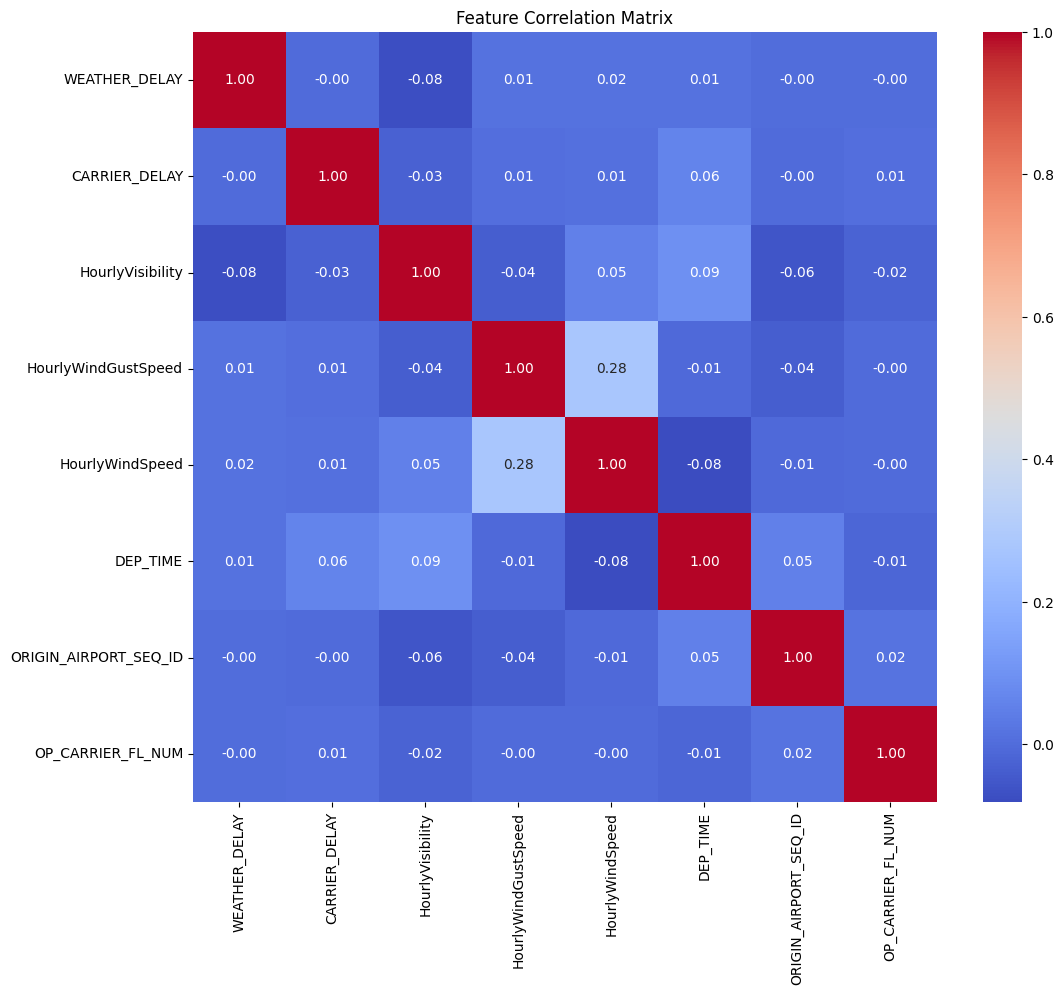

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to a pandas DataFrame
corr_matrix = pd.DataFrame(index=features, columns=features)
for (col1, col2), corr in correlations.items():
    corr_matrix.at[col1, col2] = corr
    corr_matrix.at[col2, col1] = corr

# Fill diagonal with 1s
np.fill_diagonal(corr_matrix.values, 1)

# Convert to numeric as the matrix is currently in object format
corr_matrix = corr_matrix.apply(pd.to_numeric)

# Plot using seaborn for a nicer appearance
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

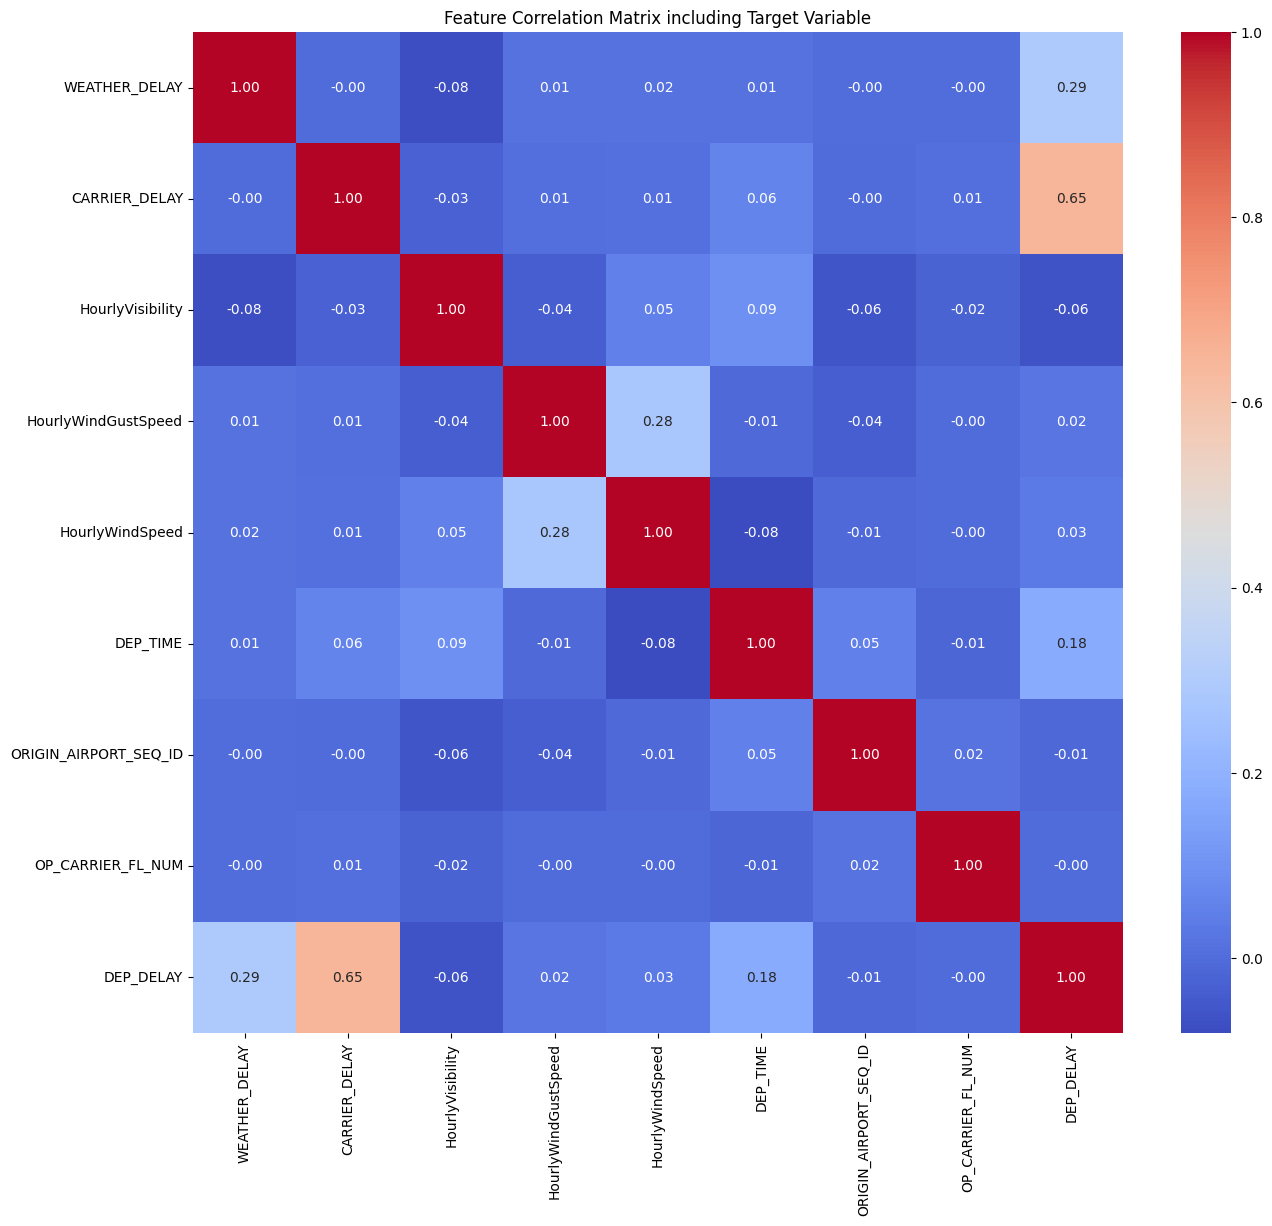

In [0]:
# Convert to pandas DataFrame
corr_matrix = pd.DataFrame(index=features + ['DEP_DELAY'], columns=features + ['DEP_DELAY'])

# Fill in the correlations
for (col1, col2), corr in correlations.items():
    corr_matrix.at[col1, col2] = corr
    corr_matrix.at[col2, col1] = corr

# Fill diagonal and target correlations
for feature in features:
    corr_matrix.at[feature, feature] = 1
    corr_matrix.at[feature, 'DEP_DELAY'] = target_corr[feature]
    corr_matrix.at['DEP_DELAY', feature] = target_corr[feature]

corr_matrix.at['DEP_DELAY', 'DEP_DELAY'] = 1

# Convert to numeric as the matrix is currently in object format
corr_matrix = corr_matrix.apply(pd.to_numeric)

# Plot using seaborn for a nicer appearance
plt.figure(figsize=(15, 13))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix including Target Variable")
plt.show()

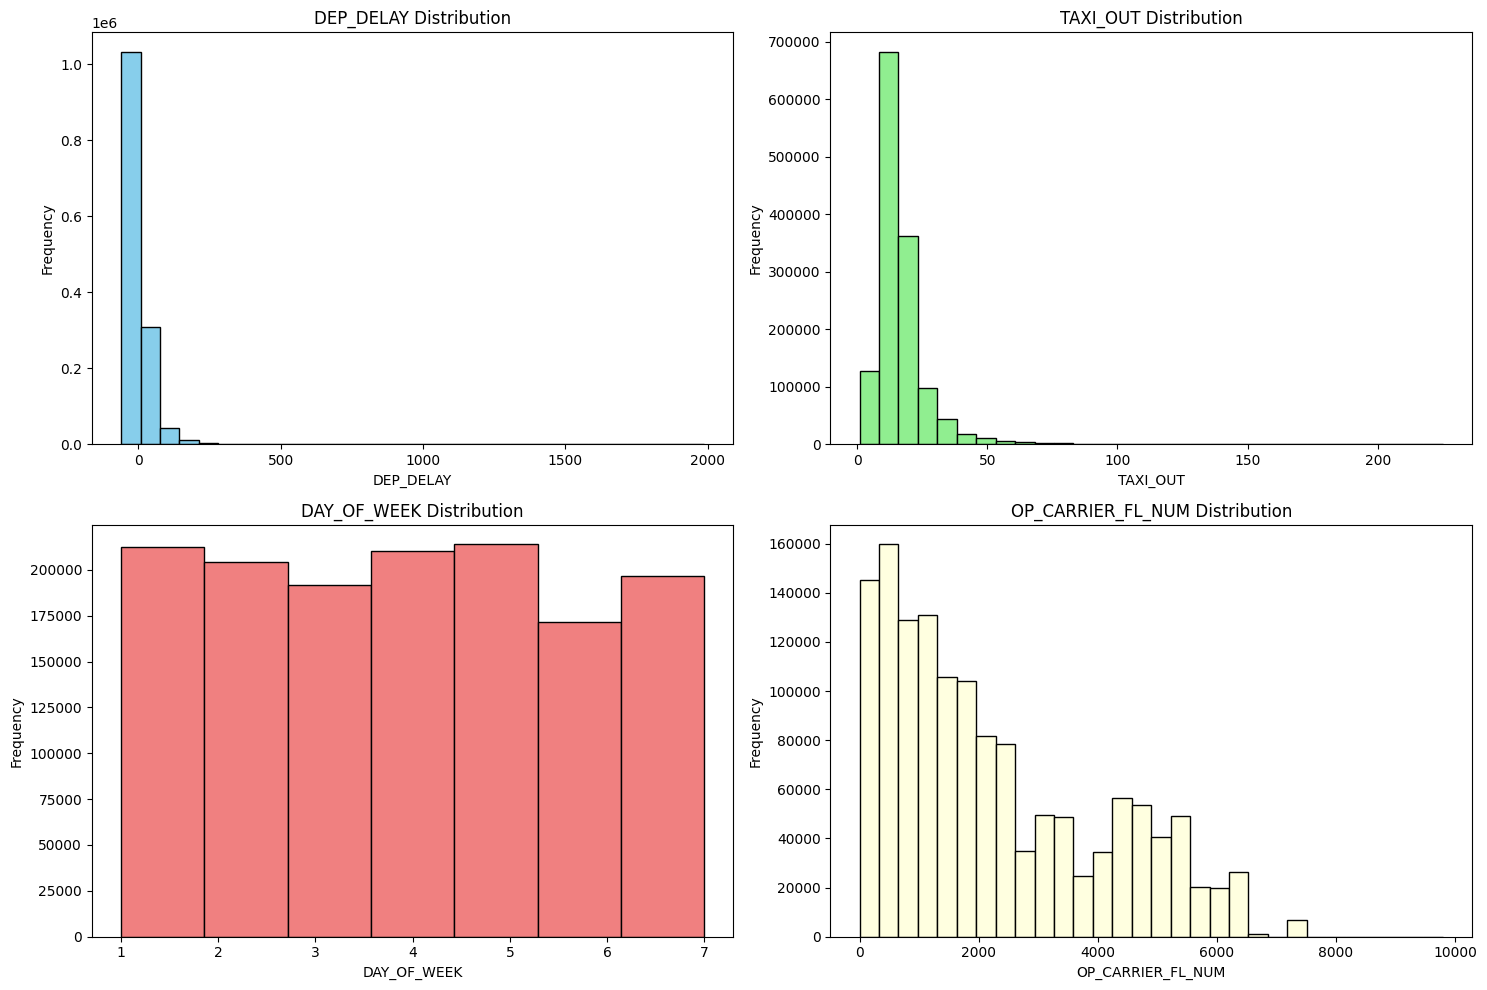

In [0]:
"""
ordinal features:
     if it is skewed, may need to simple to balance it. (dependes on the performance of model but conventionally, 50:50 is the best)
numeric features: 
    may need a log transformation if it is skewed.

1. Numeric features:
    DEP_DELAY, TAXI_OUT, WHEELS_OFF, WHEELS_ON
    TAXI_IN, DISTANCE, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY, dest_station_dis,  HourlyAltimeterSetting, HourlyDewPointTemperature, HourlyDryBulbTemperature
    HourlyPrecipitation, HourlyPresentWeatherType, HourlyPressureChange, HourlyPressureTendency, HourlyRelativeHumidity, HourlySkyConditions, HourlySeaLevelPressure, HourlyStationPressure, HourlyVisibility, HourlyWetBulbTemperature, HourlyWindDirection, HourlyWindGustSpeed, HourlyWindSpeed, 
2. Ordinal features:
    DAY_OF_WEEK, OP_CARRIER_FL_NUM, ORIGIN_AIRPORT_SEQ_ID, DEST_AIRPORT_SEQ_ID, 'CANCELLED_0',
 'CANCELLED_1', 'DIVERTED_0', 'DIVERTED_1', 'OP_CARRIER_UA', 'OP_CARRIER_NK', 'OP_CARRIER_AA',
 'OP_CARRIER_EV', 'OP_CARRIER_B6', 'OP_CARRIER_DL', 'OP_CARRIER_OO', 'OP_CARRIER_F9', 'OP_CARRIER_US',
 'OP_CARRIER_MQ', 'OP_CARRIER_HA', 'OP_CARRIER_AS', 'OP_CARRIER_VX', 'OP_CARRIER_WN', 'dest_type_large_airport',
 'dest_type_medium_airport', 'dest_type_small_airport', 'origin_type_large_airport', 'origin_type_medium_airport',
 'origin_type_small_airport', 'ORIGIN_STATE_ABR_AZ', 'ORIGIN_STATE_ABR_SC', 'ORIGIN_STATE_ABR_LA', 'ORIGIN_STATE_ABR_MN', 'ORIGIN_STATE_ABR_NJ', 'ORIGIN_STATE_ABR_OR', 'ORIGIN_STATE_ABR_VA', 'ORIGIN_STATE_ABR_RI',
 'ORIGIN_STATE_ABR_KY', 'ORIGIN_STATE_ABR_WY', 'ORIGIN_STATE_ABR_NH', 'ORIGIN_STATE_ABR_MI', 'ORIGIN_STATE_ABR_NV',
 'ORIGIN_STATE_ABR_WI', 'ORIGIN_STATE_ABR_ID', 'ORIGIN_STATE_ABR_CA', 'ORIGIN_STATE_ABR_CT', 'ORIGIN_STATE_ABR_NE',
 'ORIGIN_STATE_ABR_MT', 'ORIGIN_STATE_ABR_NC', 'ORIGIN_STATE_ABR_VT', 'ORIGIN_STATE_ABR_MD', 'ORIGIN_STATE_ABR_DE',
 'ORIGIN_STATE_ABR_MO', 'ORIGIN_STATE_ABR_VI', 'ORIGIN_STATE_ABR_IL', 'ORIGIN_STATE_ABR_ME', 'ORIGIN_STATE_ABR_WA',
 'ORIGIN_STATE_ABR_ND', 'ORIGIN_STATE_ABR_MS', 'ORIGIN_STATE_ABR_AL', 'ORIGIN_STATE_ABR_IN',
 'ORIGIN_STATE_ABR_OH', 'ORIGIN_STATE_ABR_TN', 'ORIGIN_STATE_ABR_IA', 'ORIGIN_STATE_ABR_NM',
 'ORIGIN_STATE_ABR_PA', 'ORIGIN_STATE_ABR_SD', 'ORIGIN_STATE_ABR_NY', 'ORIGIN_STATE_ABR_TX',
 'ORIGIN_STATE_ABR_WV', 'ORIGIN_STATE_ABR_GA', 'ORIGIN_STATE_ABR_MA', 'ORIGIN_STATE_ABR_KS',
 'ORIGIN_STATE_ABR_TT', 'ORIGIN_STATE_ABR_FL', 'ORIGIN_STATE_ABR_CO', 'ORIGIN_STATE_ABR_AK',
 'ORIGIN_STATE_ABR_AR', 'ORIGIN_STATE_ABR_OK', 'ORIGIN_STATE_ABR_PR', 'ORIGIN_STATE_ABR_UT',
 'ORIGIN_STATE_ABR_HI', 'DEST_STATE_ABR_AZ', 'DEST_STATE_ABR_SC', 'DEST_STATE_ABR_LA',
 'DEST_STATE_ABR_MN', 'DEST_STATE_ABR_NJ', 'DEST_STATE_ABR_OR', 'DEST_STATE_ABR_VA',
 'DEST_STATE_ABR_RI', 'DEST_STATE_ABR_KY', 'DEST_STATE_ABR_WY', 'DEST_STATE_ABR_NH',
 'DEST_STATE_ABR_MI', 'DEST_STATE_ABR_NV', 'DEST_STATE_ABR_WI', 'DEST_STATE_ABR_ID',
 'DEST_STATE_ABR_CA', 'DEST_STATE_ABR_CT', 'DEST_STATE_ABR_NE', 'DEST_STATE_ABR_MT',
 'DEST_STATE_ABR_NC', 'DEST_STATE_ABR_VT', 'DEST_STATE_ABR_MD', 'DEST_STATE_ABR_DE',
 'DEST_STATE_ABR_MO', 'DEST_STATE_ABR_VI', 'DEST_STATE_ABR_IL',
 'DEST_STATE_ABR_ME', 'DEST_STATE_ABR_WA', 'DEST_STATE_ABR_ND', 'DEST_STATE_ABR_MS', 
 'DEST_STATE_ABR_AL', 'DEST_STATE_ABR_IN', 'DEST_STATE_ABR_OH', 'DEST_STATE_ABR_TN',
 'DEST_STATE_ABR_IA', 'DEST_STATE_ABR_NM', 'DEST_STATE_ABR_PA', 'DEST_STATE_ABR_SD',
 'DEST_STATE_ABR_NY', 'DEST_STATE_ABR_TX', 'DEST_STATE_ABR_WV', 'DEST_STATE_ABR_GA',
 'DEST_STATE_ABR_MA', 'DEST_STATE_ABR_KS', 'DEST_STATE_ABR_TT', 'DEST_STATE_ABR_FL',
 'DEST_STATE_ABR_CO', 'DEST_STATE_ABR_AK', 'DEST_STATE_ABR_AR', 'DEST_STATE_ABR_OK',
 'DEST_STATE_ABR_PR', 'DEST_STATE_ABR_UT', 'DEST_STATE_ABR_HI', 'origin_icao_delay',
 'dest_icao_delay', 'TAIL_NUM_delay', 'HourlySkyConditions_None', 'HourlySkyConditions_OVC',
 'HourlySkyConditions_FEW', 'HourlySkyConditions_', 'HourlySkyConditions_BKN', 'HourlySkyConditions_SCT',
 'HourlySkyConditions_CLR', 'HourlyPresentWeatherType_DZ', 'HourlyPresentWeatherType_IC', 'HourlyPresentWeatherType_PL', 'HourlyPresentWeatherType_RA', 'HourlyPresentWeatherType_FG',
 'HourlyPresentWeatherType_None', 'HourlyPresentWeatherType_BC', 'HourlyPresentWeatherType_FZ', 'HourlyPresentWeatherType_FU', 'HourlyPresentWeatherType_MI', 'HourlyPresentWeatherType_BL',
 'HourlyPresentWeatherType_BR', 'HourlyPresentWeatherType_DU', 'HourlyPresentWeatherType_TS', 'HourlyPresentWeatherType_UP', 'HourlyPresentWeatherType_SH', 'HourlyPresentWeatherType_VC',
 'HourlyPresentWeatherType_SN', 'HourlyPresentWeatherType_GS', 'HourlyPresentWeatherType_HZ', 'HourlyPresentWeatherType_', 'HourlyPresentWeatherType_PR', 'HourlyPresentWeatherType_SQ',
 'FL_DATE_Ordinal']
"""
#manually, select some features and check it out

import matplotlib.pyplot as plt

# Convert to Pandas DataFrame for plotting (for a small subset of data)
pdf = df_encoded_target_cleaned.select('DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'DAY_OF_WEEK', 'OP_CARRIER_FL_NUM').toPandas()

# Plotting histograms for each selected feature
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()

# Numeric Features
ax[0].hist(pdf['DEP_DELAY'], bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('DEP_DELAY Distribution')
ax[0].set_xlabel('DEP_DELAY')
ax[0].set_ylabel('Frequency')

ax[1].hist(pdf['TAXI_OUT'], bins=30, color='lightgreen', edgecolor='black')
ax[1].set_title('TAXI_OUT Distribution')
ax[1].set_xlabel('TAXI_OUT')
ax[1].set_ylabel('Frequency')

# Ordinal Features
ax[2].hist(pdf['DAY_OF_WEEK'], bins=7, color='lightcoral', edgecolor='black')
ax[2].set_title('DAY_OF_WEEK Distribution')
ax[2].set_xlabel('DAY_OF_WEEK')
ax[2].set_ylabel('Frequency')

ax[3].hist(pdf['OP_CARRIER_FL_NUM'], bins=30, color='lightyellow', edgecolor='black')
ax[3].set_title('OP_CARRIER_FL_NUM Distribution')
ax[3].set_xlabel('OP_CARRIER_FL_NUM')
ax[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


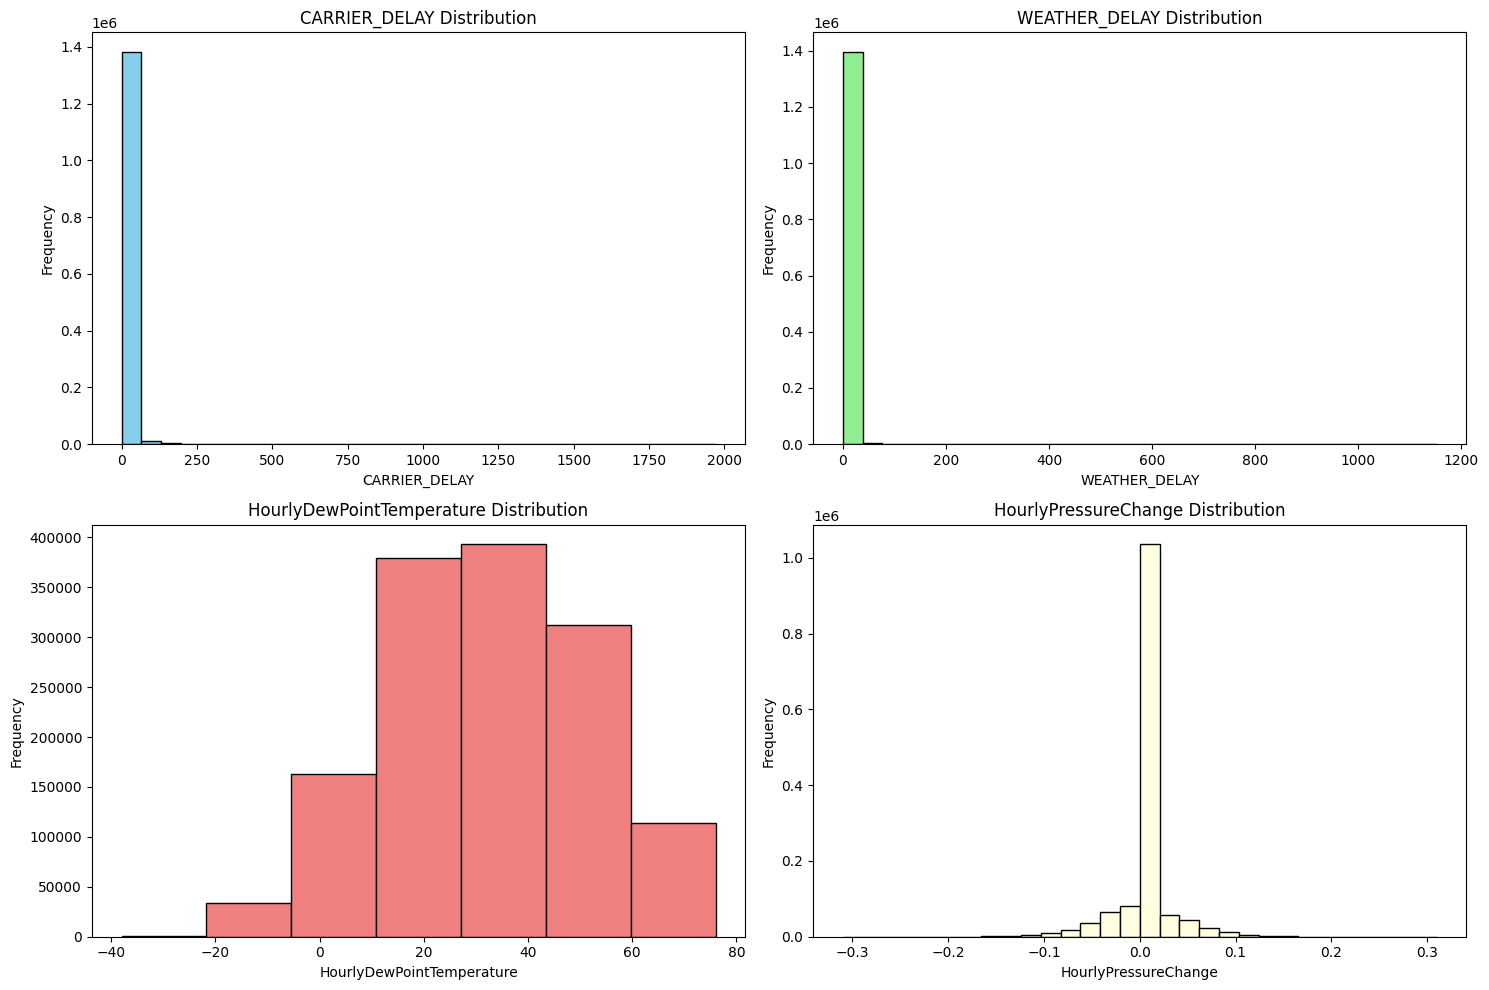

In [0]:
# Convert to Pandas DataFrame for plotting (for a small subset of data)
pdf = df_encoded_target_cleaned.select('CARRIER_DELAY', 'WEATHER_DELAY', 'HourlyDewPointTemperature', 'HourlyPressureChange').toPandas()

# Plotting histograms for each selected feature
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()

# Numeric Features
ax[0].hist(pdf['CARRIER_DELAY'], bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('CARRIER_DELAY Distribution')
ax[0].set_xlabel('CARRIER_DELAY')
ax[0].set_ylabel('Frequency')

ax[1].hist(pdf['WEATHER_DELAY'], bins=30, color='lightgreen', edgecolor='black')
ax[1].set_title('WEATHER_DELAY Distribution')
ax[1].set_xlabel('WEATHER_DELAY')
ax[1].set_ylabel('Frequency')

# Ordinal Features
ax[2].hist(pdf['HourlyDewPointTemperature'], bins=7, color='lightcoral', edgecolor='black')
ax[2].set_title('HourlyDewPointTemperature Distribution')
ax[2].set_xlabel('HourlyDewPointTemperature')
ax[2].set_ylabel('Frequency')

ax[3].hist(pdf['HourlyPressureChange'], bins=30, color='lightyellow', edgecolor='black')
ax[3].set_title('HourlyPressureChange Distribution')
ax[3].set_xlabel('HourlyPressureChange')
ax[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

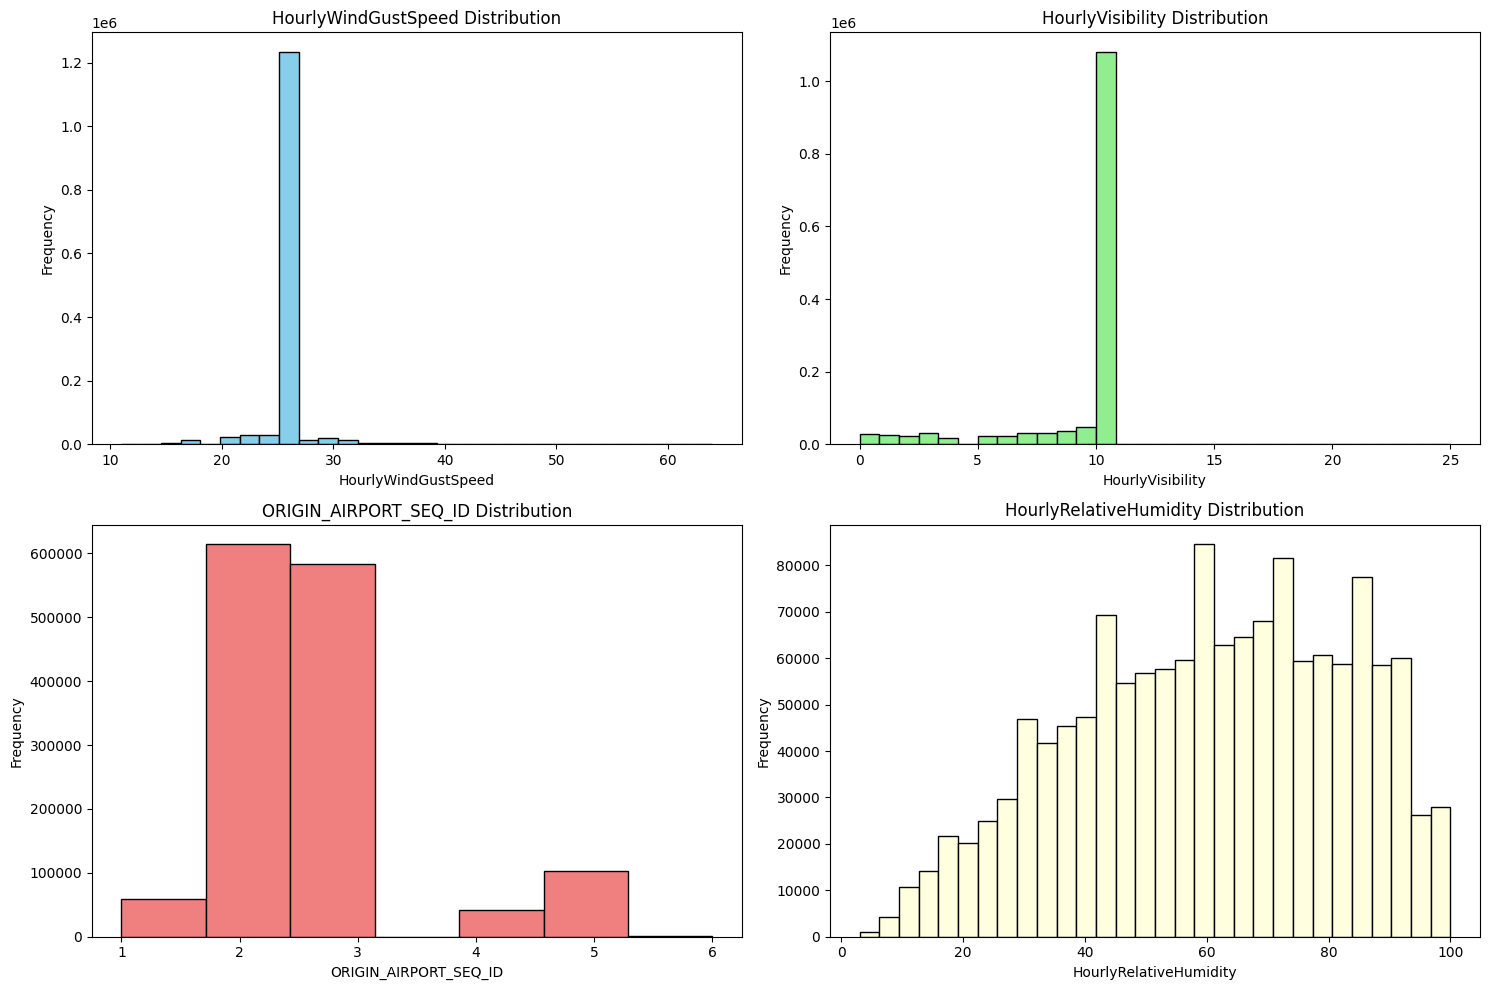

In [0]:
'HourlyWindGustSpeed', 'HourlyVisibility','ORIGIN_AIRPORT_SEQ_ID'

# Convert to Pandas DataFrame for plotting (for a small subset of data)
pdf = df_encoded_target_cleaned.select('HourlyWindGustSpeed', 'HourlyVisibility','ORIGIN_AIRPORT_SEQ_ID', 'HourlyRelativeHumidity').toPandas()

# Plotting histograms for each selected feature
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()

# Numeric Features
ax[0].hist(pdf['HourlyWindGustSpeed'], bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('HourlyWindGustSpeed Distribution')
ax[0].set_xlabel('HourlyWindGustSpeed')
ax[0].set_ylabel('Frequency')

ax[1].hist(pdf['HourlyVisibility'], bins=30, color='lightgreen', edgecolor='black')
ax[1].set_title('HourlyVisibility Distribution')
ax[1].set_xlabel('HourlyVisibility')
ax[1].set_ylabel('Frequency')

# Ordinal Features
ax[2].hist(pdf['ORIGIN_AIRPORT_SEQ_ID'], bins=7, color='lightcoral', edgecolor='black')
ax[2].set_title('ORIGIN_AIRPORT_SEQ_ID Distribution')
ax[2].set_xlabel('ORIGIN_AIRPORT_SEQ_ID')
ax[2].set_ylabel('Frequency')

ax[3].hist(pdf['HourlyRelativeHumidity'], bins=30, color='lightyellow', edgecolor='black')
ax[3].set_title('HourlyRelativeHumidity Distribution')
ax[3].set_xlabel('HourlyRelativeHumidity')
ax[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

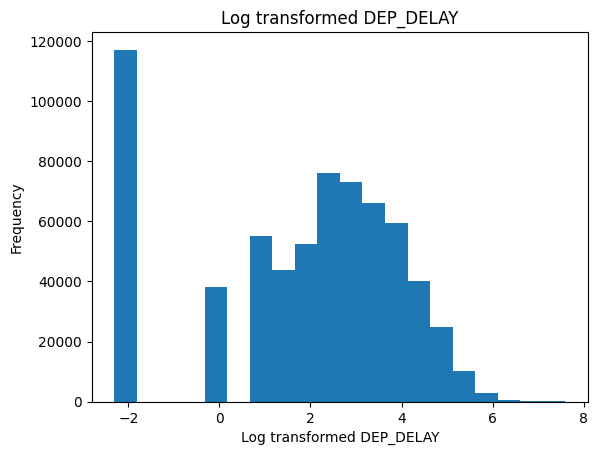

In [0]:
#DEP_DELAY may need to take log transform
from pyspark.sql.functions import log, col
df_encoded_target_cleaned = df_encoded_target_cleaned.withColumn('Log_DEP_DELAY', log(col('DEP_DELAY') + 0.1))

# Convert to Pandas DataFrame for plotting (for a small subset of data)
pdf = df_encoded_target_cleaned.select('Log_DEP_DELAY').toPandas()

# Plotting histograms for each selected feature
plt.hist(pdf, bins=20) 
plt.title('Log transformed DEP_DELAY')
plt.xlabel('Log transformed DEP_DELAY')
plt.ylabel('Frequency')
plt.show()